In [176]:
import sys 
sys.path.append('..')

In [181]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import cv2
import os

In [188]:
from utils.dataLoader_XR import LandmarksDataset, ToTensor, Rescale
from torchvision import transforms

test_path = "../Datasets/JSRT_Padchest/Test"

img_path = os.path.join(test_path, 'Images')
label_path = os.path.join(test_path, 'Landmarks')
sdf_path = os.path.join(test_path, 'SDF')
mask_path = os.path.join(test_path, 'Masks')
test_dataset = LandmarksDataset(img_path=img_path,
                                mask_path=mask_path,
                                sdf_path = sdf_path,
                                 label_path=label_path,
                                 transform = transforms.Compose([
                                             Rescale(1024),
                                             ToTensor()])
                                 )

test_ids = [t.split('/')[-1].split('.')[0] for t in test_dataset.masks]
len(test_ids)

58

In [189]:
# median model for qualitative analysis
median = {'UNet': 2, 'UNet_Dual': 2, 'DiffRast': 3 , 'HybridGNet': 3 , 'HybridGNet_IGSC': 2 , 'Dual_All_Skips_SDF': 1 , 'Dual_All_Skips': 2, 'SDF': 1}

In [197]:
# load scores for model 
UNet_scores = pd.read_pickle('JSRT Padchest scores/UNet_scores.pkl')
UNet_scores = UNet_scores.loc[UNet_scores['Model'] == 'UNet_'+str(median['UNet'])]
UNet_scores['ID'] = test_ids
UNet_scores.sort_values('ID', ascending=True)

UNet_Dual_scores = pd.read_pickle('JSRT Padchest scores/UNet_Dual_scores.pkl')
UNet_Dual_scores = UNet_Dual_scores.loc[UNet_Dual_scores['Model'] == 'UNet_Dual_'+str(median['UNet_Dual'])]
UNet_Dual_scores['ID'] = test_ids
UNet_Dual_scores.sort_values('ID', ascending=True)

DiffRast_scores = pd.read_pickle('JSRT Padchest scores/DiffRast_scores.pkl')
DiffRast_scores = DiffRast_scores.loc[DiffRast_scores['Model'] == 'DiffRast_'+str(median['DiffRast'])]
DiffRast_scores['ID'] = test_ids
DiffRast_scores.sort_values('ID', ascending=True)

HybridGNet_scores = pd.read_pickle('JSRT Padchest scores/HybridGNet_scores.pkl')
HybridGNet_scores = HybridGNet_scores.loc[HybridGNet_scores['Model'] == 'HybridGNet_'+str(median['HybridGNet'])]
HybridGNet_scores['ID'] = test_ids
HybridGNet_scores.sort_values('ID', ascending=True)

HybridGNet_IGSC_scores = pd.read_pickle('JSRT Padchest scores/HybridGNet_IGSC_scores.pkl')
HybridGNet_IGSC_scores = HybridGNet_IGSC_scores.loc[HybridGNet_IGSC_scores['Model'] == 'HybridGNet_IGSC_'+str(median['HybridGNet_IGSC'])]
HybridGNet_IGSC_scores['ID'] = test_ids
HybridGNet_IGSC_scores.sort_values('ID', ascending=True)

Dual_All_Skips_SDF_scores = pd.read_pickle('JSRT Padchest scores/Dual_All_Skips_SDF_scores.pkl')
Dual_All_Skips_SDF_scores = Dual_All_Skips_SDF_scores.loc[Dual_All_Skips_SDF_scores['Model'] == 'Dual_All_Skips_SDF_'+str(median['Dual_All_Skips_SDF'])]
Dual_All_Skips_SDF_scores['ID'] = test_ids
Dual_All_Skips_SDF_scores.sort_values('ID', ascending=True)

Dual_All_Skips_scores = pd.read_pickle('JSRT Padchest scores/Dual_All_Skips_scores.pkl')
Dual_All_Skips_scores = Dual_All_Skips_scores.loc[Dual_All_Skips_scores['Model'] == 'Dual_All_Skips_'+str(median['Dual_All_Skips'])]
Dual_All_Skips_scores['ID'] = test_ids
Dual_All_Skips_scores.sort_values('ID', ascending=True)

SDF_scores = pd.read_pickle('JSRT Padchest scores/SDF_scores.pkl')
SDF_scores = SDF_scores.loc[SDF_scores['Model'] == 'SDF_'+str(median['SDF'])]
SDF_scores['ID'] = test_ids
SDF_scores.sort_values('ID', ascending=True)

,i,Model,Dice Lungs,Dice Heart,HD Lungs,HD Heart,Jaccard Lungs,Jaccard Heart,ID
0,0,SDF_1,0.962295,0.934398,15.368149,9.100000,0.927330,0.876873,10287653421930576798556842610982533460_vpbhw6
3,1,SDF_1,0.900086,0.931400,18.152823,10.523307,0.818324,0.871608,107826458213940261956471276912177567239_9467w9
6,2,SDF_1,0.934515,0.937561,25.951975,14.853367,0.877079,0.882462,111018930978236771390670303639566239985_1bnarb
9,3,SDF_1,0.978561,0.964205,5.261654,8.118189,0.958022,0.930885,111524717177122678951114473577277787051_kt9www
12,4,SDF_1,0.949631,0.967587,7.008745,5.296461,0.904093,0.937208,117503487105610561494614672580071778723_egzn5w
15,5,SDF_1,0.877193,0.842074,28.938037,23.100000,0.781250,0.727226,119688533980562249677219589534851011987_60uvre
18,6,SDF_1,0.925383,0.914235,22.579748,17.419314,0.861129,0.842018,137967645291829623589025104429037566245_ty0ua4
21,7,SDF_1,0.933068,0.792272,14.853367,30.304826,0.874534,0.656003,145427013841140062478220774079107134701-2_yq5war
24,8,SDF_1,0.959985,0.939217,16.115210,9.521029,0.923049,0.885400,145987248740080156691960355717233717054_fbjstn
27,9,SDF_1,0.964727,0.910099,9.553141,16.300383,0.931858,0.835030,146381384591357414868726401545939282660_96eirs


In [198]:
len(UNet_scores), len(UNet_Dual_scores), len(DiffRast_scores), len(HybridGNet_scores), len(HybridGNet_IGSC_scores), len(Dual_All_Skips_SDF_scores), len(Dual_All_Skips_scores), len(SDF_scores)

(58, 58, 58, 58, 58, 58, 58, 58)

In [199]:
all_results = pd.concat([UNet_scores, UNet_Dual_scores, DiffRast_scores, HybridGNet_scores, HybridGNet_IGSC_scores, Dual_All_Skips_SDF_scores, Dual_All_Skips_scores, SDF_scores])

In [238]:
for i in range(58):
    argmax = all_results.loc[all_results['i'] == i]['Jaccard Lungs'].argmax()
    if argmax  == 5:
        print(i)

5
7
9
15
16
27
35
41
47


In [261]:
all_results.loc[all_results['i'] == 47]

,i,Model,Dice Lungs,Dice Heart,HD Lungs,HD Heart,Jaccard Lungs,Jaccard Heart,ID
142,47,UNet_2,0.986936,0.965714,4.096645,7.350000,0.974208,0.933701,JPCNN021
142,47,UNet_Dual_2,0.986831,0.959192,5.203124,5.950000,0.974005,0.921585,JPCNN021
143,47,DiffRast_3,0.977657,0.962937,24.109386,5.960285,0.956291,0.928523,JPCNN021
143,47,HybridGNet_3,0.951658,0.964898,28.836262,9.961175,0.907774,0.932177,JPCNN021
142,47,HybridGNet_IGSC_2,0.972850,0.956924,14.716657,7.771261,0.947135,0.917407,JPCNN021
141,47,Dual_All_Skips_SDF_1,0.987145,0.965033,4.563442,5.610927,0.974616,0.932429,JPCNN021
142,47,Dual_All_Skips_2,0.985805,0.959218,4.550000,6.112487,0.972008,0.921632,JPCNN021
141,47,SDF_1,0.977291,0.963520,19.361043,5.600000,0.955590,0.929608,JPCNN021


In [258]:
def load_preds(model_name, examples, gt):
    pred_all = []
    for i in range(len(examples)):
        pred = np.load(sorted(glob.glob('JSRT Padchest predictions/'+model_name+'_'+str(median[model_name])+'/*.npy'))[examples[i]])
        pred = colour_organ(pred)
        pred_all.append(pred)
    return pred_all

def colour_organ(pred):
    lungs = np.tile(np.expand_dims(pred == 1, -1), [1,1,3]) * lungs_colour
    heart = np.tile(np.expand_dims(pred == 2, -1), [1,1,3]) * heart_colour
    return lungs + heart


In [259]:
lungs_colour = np.stack([np.full((1024, 1024), colour) for colour in [41, 113, 207]], axis=-1)
heart_colour = np.stack([np.full((1024, 1024), colour) for colour in [245, 43, 39]], axis=-1)

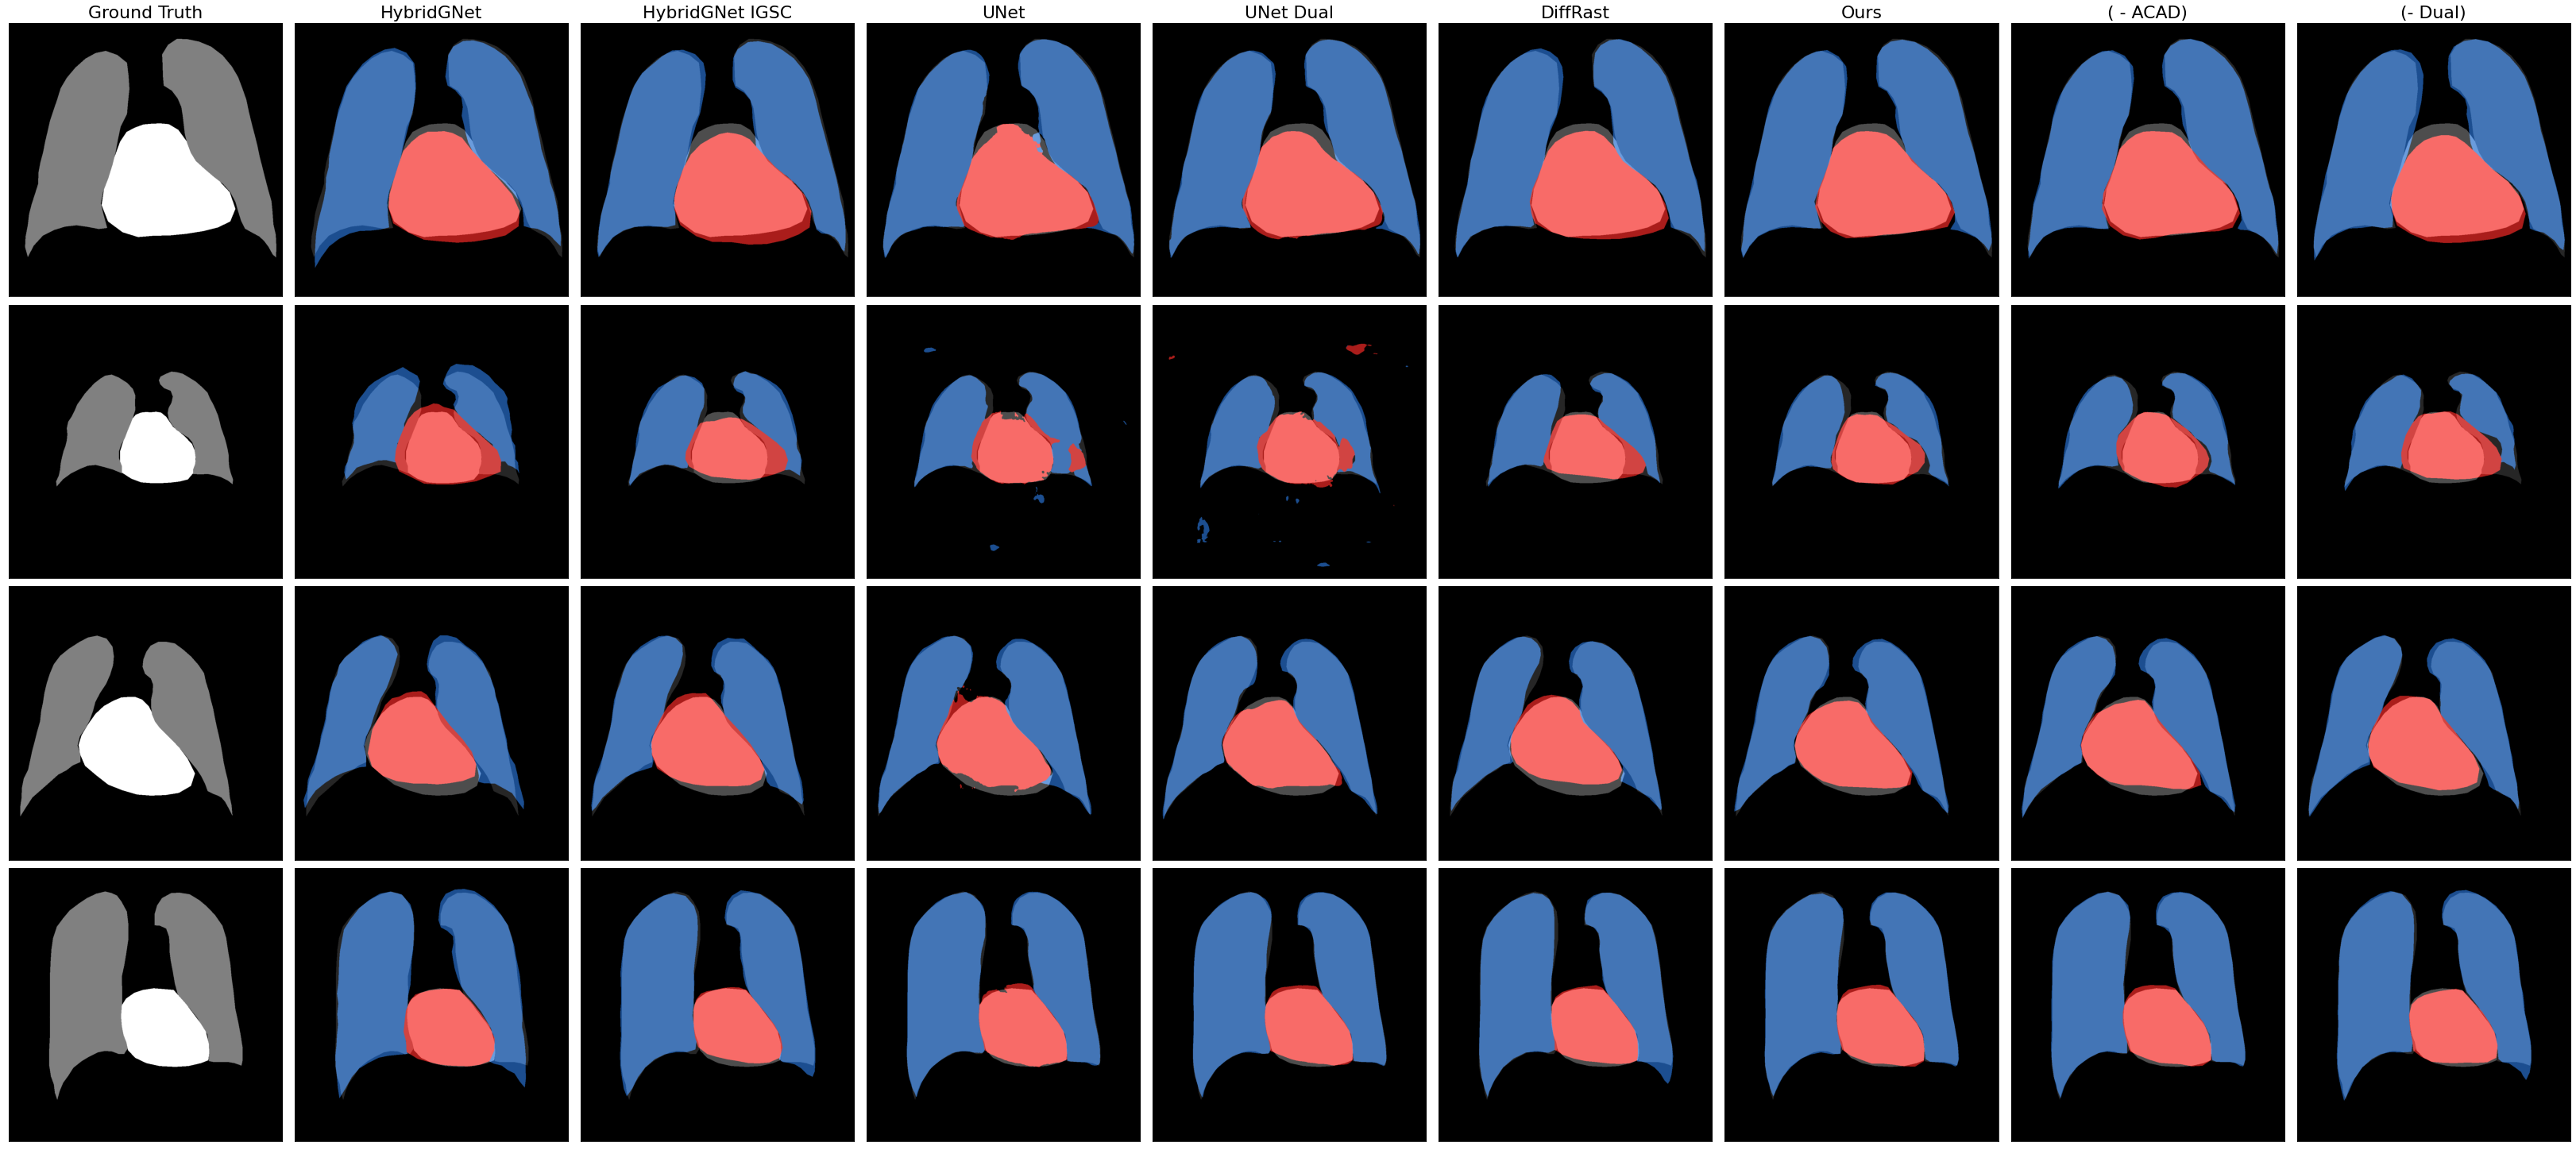

In [286]:
examples = [9,5,12,47] # 21 is pretty good, 
columns = ['Ground Truth', 'HybridGNet', 'HybridGNet IGSC', 'UNet', 'UNet Dual', 'DiffRast', 'Ours', '( - ACAD)', '(- Dual)']
alpha = .7

images = [cv2.imread(sorted(glob.glob('../Datasets/JSRT_Padchest/Test/Images/*.png'))[examples[i]], cv2.IMREAD_GRAYSCALE) for i in range(len(examples))]
gt = [np.load(sorted(glob.glob('../Datasets/JSRT_Padchest/Test/Masks/*.npy'))[examples[i]]) for i in range(len(examples))]

HybridGNet_preds = load_preds('HybridGNet', examples, gt)
HybridGNet_IGSC_preds = load_preds('HybridGNet_IGSC', examples, gt)
UNet_preds = load_preds('UNet', examples, gt)
UNet_Dual_preds = load_preds('UNet_Dual', examples, gt)
DiffRast_preds = load_preds('DiffRast', examples, gt)
Dual_All_Skips_SDF_preds = load_preds('Dual_All_Skips_SDF', examples, gt)
Dual_All_Skips_preds = load_preds('Dual_All_Skips', examples, gt)
SDF_preds = load_preds('SDF', examples, gt)

# 9 columsn, 4 rows. each subplot has gt + pred
fig, axes = plt.subplots(len(examples),9, figsize=(45, 20), constrained_layout=True)

for i in range(len(examples)):
    for j in range(9):
        gti = gt[i]
        axes[i,j].imshow(gti, cmap='gray')
        
    axes[i,0].imshow(gt[i], cmap='gray')    
    axes[i,1].imshow(HybridGNet_preds[i], alpha=alpha)
    axes[i,2].imshow(HybridGNet_IGSC_preds[i], alpha=alpha)
    axes[i,3].imshow(UNet_preds[i], alpha=alpha)
    axes[i,4].imshow(UNet_Dual_preds[i], alpha=alpha)
    axes[i,5].imshow(DiffRast_preds[i], alpha=alpha)
    axes[i,6].imshow(Dual_All_Skips_SDF_preds[i], alpha=alpha)
    axes[i,7].imshow(Dual_All_Skips_preds[i], alpha=alpha)
    axes[i,8].imshow(SDF_preds[i], alpha=alpha)

for i in range(9):
    axes[0, i].set_title(columns[i], size=22)
        
for ax in axes.flatten():
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')
    
plt.savefig('Graphics/QUALITATIVE.png', dpi=300)
    
    